In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("data.csv")
x=df.iloc[:,2:32]
y=df.iloc[:,1]
le=preprocessing.LabelEncoder();
y=le.fit_transform(y)

In [5]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=.2)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
y_pred=knn.predict(x_test)

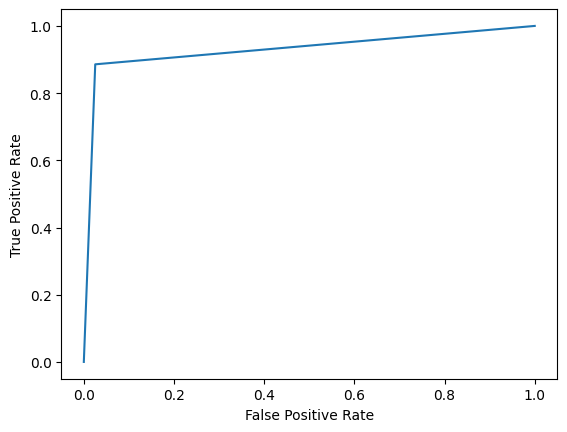

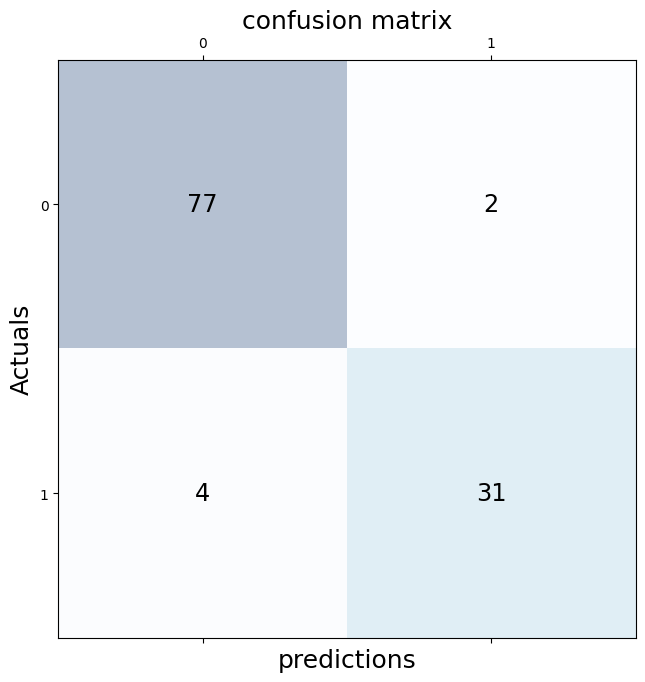

In [19]:
from sklearn import metrics 
fpr_p,tpr_p,_=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr_p,tpr_p)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix,cmap=plt.cm.Blues,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='xx-large')
plt.xlabel('predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('confusion matrix',fontsize=18)
plt.show()